In [2]:
import pickle, os
import numpy as np
import pandas as pd
from collections import defaultdict 
from sklearn.model_selection import train_test_split

c:\Users\Legion\.conda\envs\tf210\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Legion\.conda\envs\tf210\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Legion\.conda\envs\tf210\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Load Data

In [3]:
def load_data(data_path = 'data/Donation Eligible.xlsx'):
    data = pd.read_excel(data_path)
    inputs, outputs = data.iloc[:,:-1], data.iloc[:,-1]
    return inputs.values, outputs.values

In [4]:
inputs, outputs = load_data()

def split_data(inputs, outputs, test_size = 0.2):
    X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(inputs, outputs)

# Models

In [6]:
import seaborn as sns
from sklearn.svm import SVC
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
# Random Forest Classifier

rfc = RandomForestClassifier(
                            n_estimators=100, 
                            random_state=42
                            )
rfc.fit(X_train, y_train)

# XGBoost Classifier

xgb = XGBClassifier(
                    n_estimators=100,   
                    random_state=42
                    )
xgb.fit(X_train, y_train)

# Support Vector Machine

svc = SVC(
        kernel='linear',
        random_state=42
        )
svc.fit(X_train, y_train)

# KNN Classifier

knn = KNeighborsClassifier(
                            n_neighbors=5,
                            metric='minkowski',
                            p=2
                            )
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
P_rfc = rfc.predict(X_test)
P_xgb = xgb.predict(X_test)
P_svc = svc.predict(X_test)
P_knn = knn.predict(X_test)

In [9]:
print("Classification Report - Random Forest Classifier")
print(classification_report(y_test, P_rfc))

print("\nClassification Report - XGBoost Classifier")
print(classification_report(y_test, P_xgb))

print("\nClassification Report - Support Vector Machine")
print(classification_report(y_test, P_svc))

print("\nClassification Report - KNN Classifier")
print(classification_report(y_test, P_knn))

Classification Report - Random Forest Classifier
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.56      1.00      0.71         5

    accuracy                           0.60        10
   macro avg       0.78      0.60      0.52        10
weighted avg       0.78      0.60      0.52        10


Classification Report - XGBoost Classifier
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      1.00      0.67         5

    accuracy                           0.50        10
   macro avg       0.25      0.50      0.33        10
weighted avg       0.25      0.50      0.33        10


Classification Report - Support Vector Machine
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.56      1.00      0.71         5

    accuracy                           0.

c:\Users\Legion\.conda\envs\tf210\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Legion\.conda\envs\tf210\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Legion\.conda\envs\tf210\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


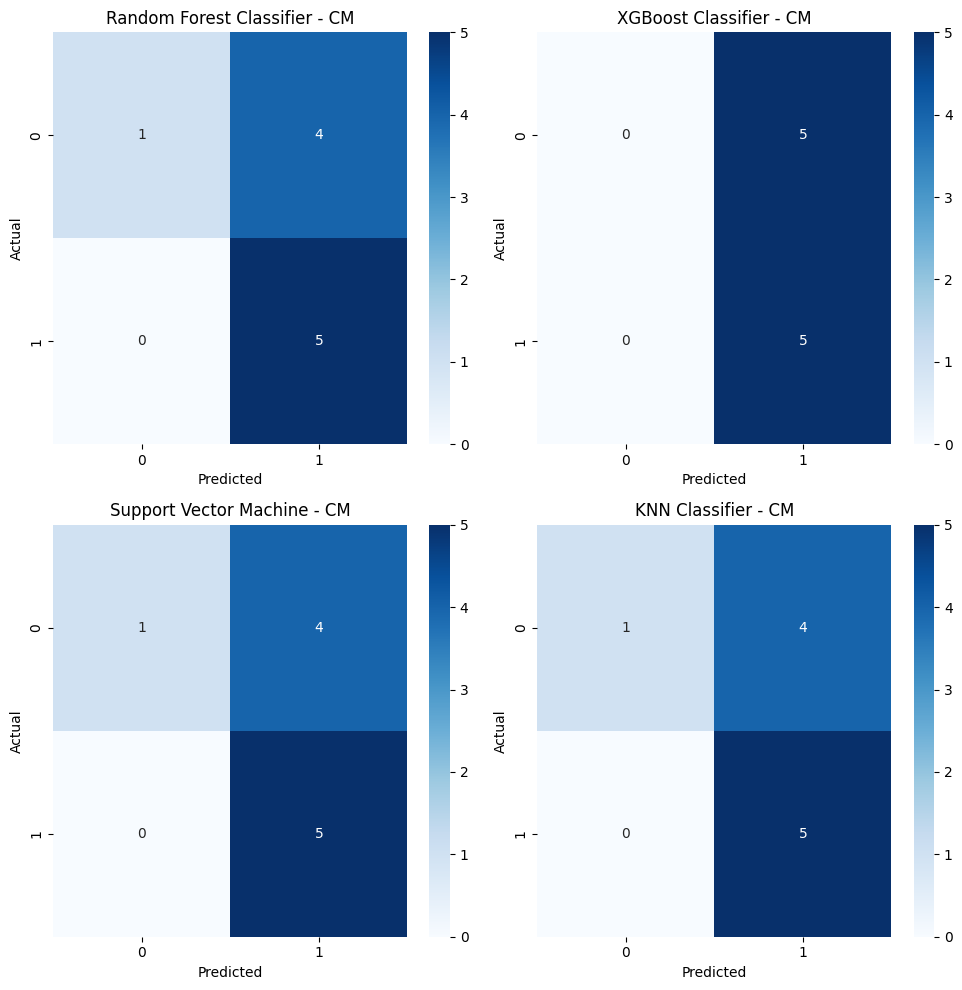

In [10]:
cm1 = confusion_matrix(y_test, P_rfc)
cm2 = confusion_matrix(y_test, P_xgb)
cm3 = confusion_matrix(y_test, P_svc)
cm4 = confusion_matrix(y_test, P_knn)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Classifier - CM')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(2, 2, 2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Classifier - CM')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(2, 2, 3)
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues')
plt.title('Support Vector Machine - CM')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(2, 2, 4)
sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Classifier - CM')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


In [18]:
# Save KNN model
with open('weights/eligibility/rfc.pickle', 'wb') as f:
    pickle.dump(rfc, f)

# Inferece

In [16]:
import pickle, os
import numpy as np
import pandas as pd

In [19]:
sample_json = {
            "Heart Disease": 0,
            "Diabetes": 0,
            "Fits": 0,
            "Strokes": 0,
            "Asthma/ Lung Disease": 0,
            "Liver Disease": 0,
            "Kidney Diseases": 0,
            "Blood Disorders": 0,
            "Cancer": 0,
            "Blood Pressure": 1,
            "Nickel": 1,
            "Anaphylaxis": 0,
            "Dust": 0,
            "Pollen": 0,
            "Medication": 0,
            "Food": 0,
            "Animal fur": 0,
            "Insect": 0,
            "Hepatitis": 0,
            "Rubella": 0,
            "Rabies": 0,
            "Chickenpox": 0,
            "Yellow fever": 0,
            "Covid Vaccination": 0
            }

with open('weights/eligibility/rfc.pickle', 'rb') as f:
    rfc = pickle.load(f)

In [26]:
def inference_symptoms(sample_json):
    sample_json = pd.DataFrame(sample_json, index=[0])
    sample_json = sample_json.applymap(lambda x: int(x))
    sample_json = sample_json.values
    pred = rfc.predict(sample_json).squeeze()
    return 'eligible' if pred == 1 else 'not eligible'

In [27]:
inference_symptoms(sample_json)

'eligible'